# 데이터 다운로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install segmentation-models-pytorch albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 8.7 MB/s eta 0:00:00


In [ ]:
import segmentation_models_pytorch
print(segmentation_models_pytorch.__version__)

0.5.0


In [ ]:
!cp /content/drive/MyDrive/lionCV/3rd_project/DataSet/Project03_Edge/DataSet/SDLane.zip /content


In [ ]:
!unzip /content/SDLane.zip -d /content/dataset/

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2846.json  
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2848.json  
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2849.json  
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2860.json  
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2861.json  
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2862.json  
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2864.json  
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2871.json  
  inflating: /content/dataset/SDLane/train/labels/dc55c34f96ceb3076cb3af5c8ad4db68775fb98f/2872.json  
  inflating: /content/

# 데이터 전처리

In [ ]:
import os
import shutil
from tqdm import tqdm  # 진행 상황 표시바

# 1. 경로 설정 (Moo님의 환경에 맞게 수정 가능)
# 원본 데이터가 있는 경로
SOURCE_ROOT = '/content/dataset/SDLane'
# 정리된 데이터를 저장할 경로
DEST_ROOT = '/content/data'

def organize_dataset(split_name):
    """
    split_name: 'train' 또는 'test'
    """
    print(f"=== {split_name} 데이터 정리 시작 ===")

    # 처리할 타입 (이미지와 라벨)
    data_types = ['images', 'labels']

    for data_type in data_types:
        src_base_path = os.path.join(SOURCE_ROOT, split_name, data_type)
        dst_base_path = os.path.join(DEST_ROOT, split_name, data_type)

        # 목적지 폴더 생성 (없으면 생성)
        os.makedirs(dst_base_path, exist_ok=True)

        # 해당 경로가 존재하는지 확인
        if not os.path.exists(src_base_path):
            print(f"경로 없음: {src_base_path}")
            continue

        # 서브 폴더들 (예: 0932b1d...) 가져오기
        subfolders = [f for f in os.listdir(src_base_path) if os.path.isdir(os.path.join(src_base_path, f))]

        print(f"[{data_type}] {len(subfolders)}개의 서브 폴더 처리 중...")

        for folder_name in tqdm(subfolders):
            # 접두사 생성 (폴더명 앞 6글자)
            prefix = folder_name[:6]

            src_folder_path = os.path.join(src_base_path, folder_name)

            # 서브 폴더 내의 파일들 순회
            files = os.listdir(src_folder_path)

            for file_name in files:
                # 원본 파일 경로
                src_file = os.path.join(src_folder_path, file_name)

                # 파일인지 확인 (디렉토리 제외)
                if os.path.isfile(src_file):
                    # 새 파일 이름 생성 (예: 0932_0001.jpg)
                    new_file_name = f"{prefix}_{file_name}"
                    dst_file = os.path.join(dst_base_path, new_file_name)

                    # 파일 복사
                    shutil.copy2(src_file, dst_file)

    print(f"=== {split_name} 정리 완료! 저장 위치: {os.path.join(DEST_ROOT, split_name)} ===\n")

# 실행
if __name__ == "__main__":
    # train 폴더 정리
    organize_dataset('train')
    # test 폴더 정리
    organize_dataset('test')

=== train 데이터 정리 시작 ===
[images] 29개의 서브 폴더 처리 중...


100%|██████████| 29/29 [00:21<00:00,  1.35it/s]


[labels] 29개의 서브 폴더 처리 중...


100%|██████████| 29/29 [00:04<00:00,  7.09it/s]


=== train 정리 완료! 저장 위치: /content/data/train ===

=== test 데이터 정리 시작 ===
[images] 28개의 서브 폴더 처리 중...


100%|██████████| 28/28 [00:00<00:00, 30.24it/s]


[labels] 28개의 서브 폴더 처리 중...


100%|██████████| 28/28 [00:00<00:00, 66.30it/s]

=== test 정리 완료! 저장 위치: /content/data/test ===



In [ ]:
import os
print(f'train images : {len(os.listdir('/content/data/train/images'))}')
print(f'train labels : {len(os.listdir('/content/data/train/labels'))}')
print(f'test images : {len(os.listdir('/content/data/test/images'))}')
print(f'test labels : {len(os.listdir('/content/data/test/labels'))}')

train images : 39096
train labels : 39096
test images : 3853
test labels : 3853


선택된 파일: e80e5f_0107
이미지 크기: (1208, 1920, 3)
감지된 차선 개수: 4


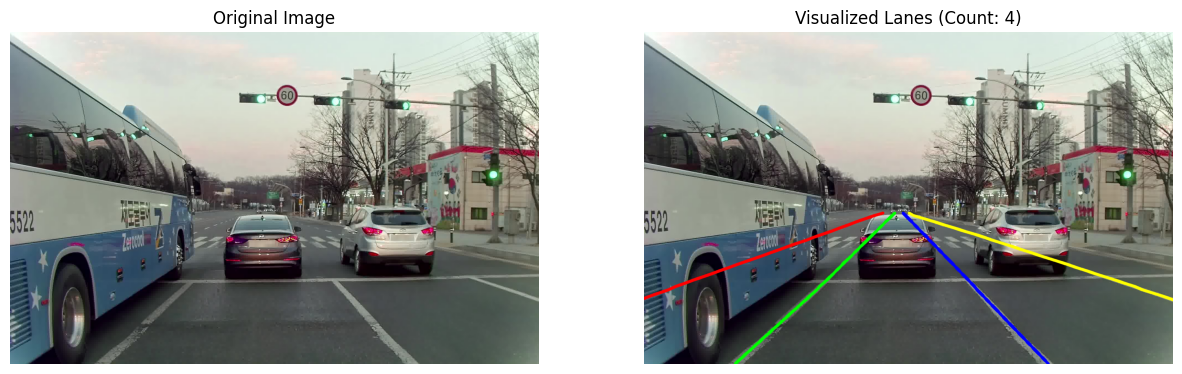

In [ ]:
# 학습 데이터 시각화

import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. 데이터 경로 설정 (앞서 정리한 폴더 경로)
DATA_ROOT = '/content/data/train'
IMAGE_DIR = os.path.join(DATA_ROOT, 'images')
LABEL_DIR = os.path.join(DATA_ROOT, 'labels')

def visualize_lane(image_path, json_path):
    # 이미지 로드
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 시각화를 위한 복사본 (원본 보호)
    vis_img = img.copy()

    # JSON 로드
    with open(json_path, 'r') as f:
        label_data = json.load(f)

    # 차선 그리기
    # geometry: 차선 점들의 좌표 리스트 (Nx2)
    # idx: 각 차선의 ID (어떤 차선인지 구분)
    lane_coords = label_data['geometry']
    lane_ids = label_data['idx']

    # 색상 팔레트 (R, G, B) - 차선마다 다른 색으로 그리기 위함
    colors = [
        (255, 0, 0),   # ID 1: 빨강
        (0, 255, 0),   # ID 2: 초록
        (0, 0, 255),   # ID 3: 파랑
        (255, 255, 0), # ID 4: 노랑
        (0, 255, 255)  # ID 5: 청록
    ]

    print(f"이미지 크기: {img.shape}")
    print(f"감지된 차선 개수: {len(lane_coords)}")

    for i, lane in enumerate(lane_coords):
        # 좌표를 정수형 numpy 배열로 변환 (OpenCV는 정수 좌표만 받음)
        pts = np.array(lane, np.int32)
        pts = pts.reshape((-1, 1, 2)) # (N, 1, 2) 형태여야 함

        # 색상 선택 (ID가 있으면 ID에 맞춰 색상 부여, 없으면 순서대로)
        color_idx = (lane_ids[i] - 1) % len(colors) if lane_ids else i % len(colors)
        color = colors[color_idx]

        # 이미지 위에 선 그리기 (두께 10px)
        cv2.polylines(vis_img, [pts], isClosed=False, color=color, thickness=10)

    # 시각화 출력
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Visualized Lanes (Count: {len(lane_coords)})")
    plt.imshow(vis_img)
    plt.axis('off')
    plt.show()

# --- 실행 부분 ---
# 이미지 폴더에서 랜덤하게 하나 선택
if os.path.exists(IMAGE_DIR) and len(os.listdir(IMAGE_DIR)) > 0:
    all_files = os.listdir(IMAGE_DIR)
    # jpg 파일만 골라내기
    image_files = [f for f in all_files if f.endswith('.jpg')]

    if image_files:
        random_file = random.choice(image_files)

        # 파일명에서 확장자 제거 후 경로 조합
        file_id = os.path.splitext(random_file)[0]

        img_path = os.path.join(IMAGE_DIR, f"{file_id}.jpg")
        json_path = os.path.join(LABEL_DIR, f"{file_id}.json")

        print(f"선택된 파일: {file_id}")

        if os.path.exists(json_path):
            visualize_lane(img_path, json_path)
        else:
            print(f"오류: 매칭되는 JSON 파일이 없습니다 -> {json_path}")
    else:
        print("폴더에 jpg 파일이 없습니다.")
else:
    print(f"경로를 확인해주세요: {IMAGE_DIR}")

In [ ]:
# json 형식의 라벨을 .png 형식의 mask로 변환

import os
import json
import cv2
import numpy as np
from tqdm import tqdm

# 경로 설정 (Moo님의 정리된 경로 기준)
BASE_DIR = '/content/data'
SPLITS = ['train', 'test']

def create_masks(split):
    image_dir = os.path.join(BASE_DIR, split, 'images')
    label_dir = os.path.join(BASE_DIR, split, 'labels')
    mask_dir = os.path.join(BASE_DIR, split, 'masks') # 새로 만들 폴더

    os.makedirs(mask_dir, exist_ok=True)

    # 처리할 파일 리스트 (JSON 기준)
    json_files = [f for f in os.listdir(label_dir) if f.endswith('.json')]

    print(f"[{split}] 마스크 생성 시작... 총 {len(json_files)}개")

    for json_file in tqdm(json_files):
        file_id = os.path.splitext(json_file)[0]

        # 1. 원본 이미지 크기 확인을 위해 이미지 로드 (혹은 고정 해상도 사용)
        # SDLane은 보통 1920x1080이지만, 안전하게 이미지에서 크기를 읽어옵니다.
        img_path = os.path.join(image_dir, f"{file_id}.jpg")
        if not os.path.exists(img_path):
            continue

        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        # 2. 빈 마스크 생성 (0: 배경/검은색)
        mask = np.zeros((h, w), dtype=np.uint8)

        # 3. JSON 로드
        json_path = os.path.join(label_dir, json_file)
        with open(json_path, 'r') as f:
            data = json.load(f)

        lane_coords = data['geometry']

        # 4. 차선 그리기 (값: 255 or 1)
        # 시각화 때는 1,2,3 색을 다르게 했지만, 학습용은 "차선(1)"로 통일합니다.
        # 나중에 시각적 확인을 위해 255(흰색)로 그리고, 학습 때 1로 바꾸거나
        # 처음부터 1로 그릴 수 있습니다. 여기서는 눈으로 확인하기 좋게 255로 그립니다.
        for lane in lane_coords:
            pts = np.array(lane, np.int32)
            pts = pts.reshape((-1, 1, 2))

            # 두께 15px로 그림 (학습 효율을 위해 두껍게)
            cv2.polylines(mask, [pts], isClosed=False, color=255, thickness=15)

        # 5. 저장 (PNG로 저장해야 압축 손실이 없음)
        save_path = os.path.join(mask_dir, f"{file_id}.png")
        cv2.imwrite(save_path, mask)

# 실행
create_masks('train')
create_masks('test')

[train] 마스크 생성 시작... 총 39096개


100%|██████████| 39096/39096 [12:01<00:00, 54.17it/s]


[test] 마스크 생성 시작... 총 3853개


100%|██████████| 3853/3853 [01:11<00:00, 54.06it/s]


선택된 파일: 5bbb9c_0423
이미지 크기: (1208, 1920, 3)
마스크 크기: (1208, 1920)
마스크 포함 값(Classes): [  0 255] (0:배경, 255/1:차선 이어야 함)


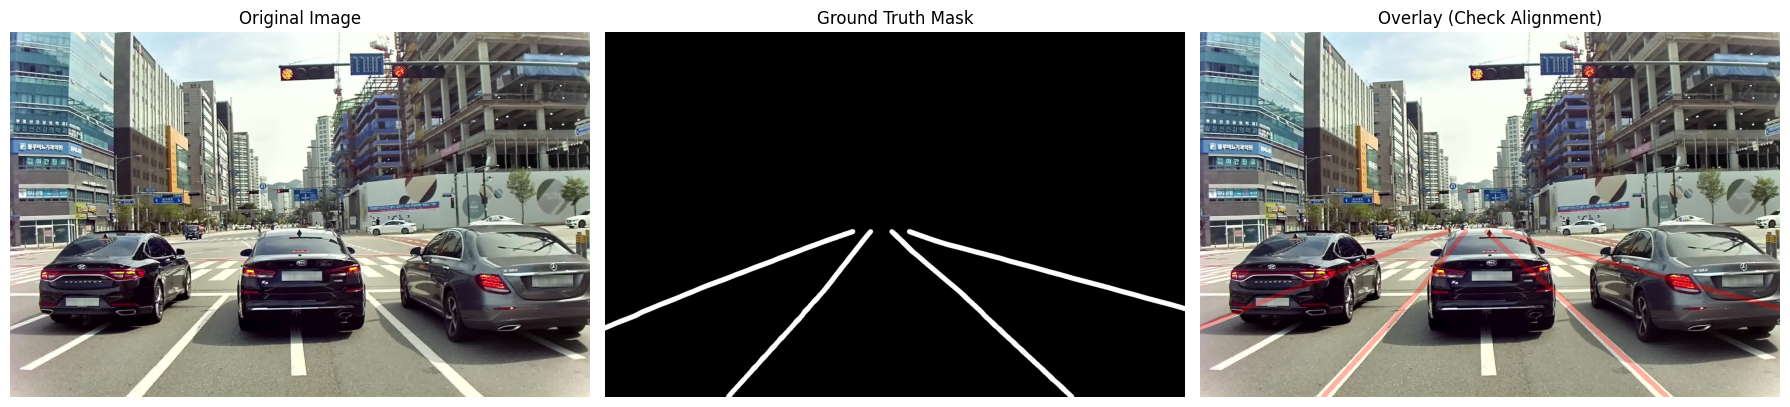

In [ ]:
# 마스크 시각화

import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 경로 설정 (Moo님의 환경에 맞게 확인해주세요)
DATA_ROOT = '/content/data/train'
IMAGE_DIR = os.path.join(DATA_ROOT, 'images')
MASK_DIR = os.path.join(DATA_ROOT, 'masks')

def visualize_random_sample():
    # 이미지 폴더 확인
    if not os.path.exists(IMAGE_DIR):
        print(f"오류: 이미지 폴더를 찾을 수 없습니다 -> {IMAGE_DIR}")
        return

    # jpg 파일 리스트 가져오기
    all_files = os.listdir(IMAGE_DIR)
    image_files = [f for f in all_files if f.endswith('.jpg')]

    if not image_files:
        print("폴더에 jpg 이미지가 없습니다.")
        return

    # 랜덤 선택
    random_file = random.choice(image_files)
    file_id = os.path.splitext(random_file)[0]

    img_path = os.path.join(IMAGE_DIR, f"{file_id}.jpg")
    mask_path = os.path.join(MASK_DIR, f"{file_id}.png")

    print(f"선택된 파일: {file_id}")

    # 2. 이미지 및 마스크 로드
    if not os.path.exists(mask_path):
        print(f"오류: 매칭되는 마스크 파일이 없습니다 -> {mask_path}")
        print("먼저 create_masks 코드를 실행해서 마스크를 생성해주세요!")
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # 3. 마스크 데이터 정보 출력 (디버깅용)
    unique_values = np.unique(mask)
    print(f"이미지 크기: {img.shape}")
    print(f"마스크 크기: {mask.shape}")
    print(f"마스크 포함 값(Classes): {unique_values} (0:배경, 255/1:차선 이어야 함)")

    # 4. 오버레이(Overlay) 이미지 만들기
    # 마스크가 있는 부분(값이 0이 아닌 부분)을 빨간색으로 칠하기
    overlay = img.copy()
    # 마스크가 흰색(255) 또는 1인 부분 찾기
    lane_area = mask > 0

    # BGR 기준 빨간색 (255, 0, 0) - 여기서는 RGB이므로 (255, 0, 0)
    overlay[lane_area] = [255, 0, 0]

    # 원본과 붉은 마스크를 7:3 비율로 섞기
    blended = cv2.addWeighted(img, 0.7, overlay, 0.3, 0)

    # 5. 시각화 (3개 패널)
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Ground Truth Mask")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Overlay (Check Alignment)")
    plt.imshow(blended)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# 실행
visualize_random_sample()

In [ ]:
print(f'train images : {len(os.listdir('/content/data/train/images'))}')
print(f'train labels : {len(os.listdir('/content/data/train/labels'))}')
print(f'train masks : {len(os.listdir('/content/data/train/masks'))}')
print(f'test images : {len(os.listdir('/content/data/test/images'))}')
print(f'test labels : {len(os.listdir('/content/data/test/labels'))}')
print(f'test masks : {len(os.listdir('/content/data/test/masks'))}')

train images : 39096
train labels : 39096
train masks : 39096
test images : 3853
test labels : 3853
test masks : 3853


# 모델 학습

In [ ]:
!pip install -q segmentation-models-pytorch albumentations timm

In [ ]:
import albumentations
import timm
import cv2
import torch
import numpy as np

print(albumentations.__version__)
print(timm.__version__)
print(cv2.__version__)
print(torch.__version__)
print(np.__version__)

2.0.8
1.0.24
4.13.0
2.10.0+cu128
2.0.2


In [ ]:
import torch
import gc

def clear_vram():
    # 1. 파이썬 가비지 컬렉션 수행 (참조가 끝난 객체 정리)
    gc.collect()

    # 2. PyTorch의 GPU 캐시 비우기
    torch.cuda.empty_cache()

    # 3. (선택사항) 현재 활성화된 모든 GPU 메모리 할당 해제 시도
    # 이 작업은 실행 중인 텐서가 있을 경우 에러가 날 수 있으니 주의하세요.
    # torch.cuda.ipc_collect()

    print("VRAM 정리 완료!")

# 실행
clear_vram()

VRAM 정리 완료!


In [ ]:
# 데이터셋 구축

import os
import cv2
import torch
import numpy as np
import time
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torch.utils.data import Dataset, DataLoader
import segmentation_models_pytorch as smp
from tqdm import tqdm

# --- Hyperparameters ---
ENCODER = 'timm-regnety_004'  # ResNet50 대안, RegNetY-400MF 모델.
ENCODER_WEIGHTS = 'imagenet'
DEVICE = 'cuda'

BATCH_SIZE = 128
LR = 1e-4
EPOCHS = 80
PATIENCE = 10       # 성능 개선이 없을 때 기다릴 에포크 수
COUNTER = 0         # 성능 개선이 없는 에포크를 세는 카운터

# 해상도 (1920x1080 -> 960x544)
HEIGHT = 544
WIDTH = 960

class SDLaneDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform

        self.img_dir = os.path.join(root_dir, split, 'images')
        self.mask_dir = os.path.join(root_dir, split, 'masks')

        # 파일 리스트 로드
        self.images = [f for f in os.listdir(self.img_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        file_id = os.path.splitext(img_name)[0]

        img_path = os.path.join(self.img_dir, img_name)
        mask_path = os.path.join(self.mask_dir, f"{file_id}.png")

        # 이미지 로드
        image = cv2.imread(img_path)

        if image is None: # <--- [안전장치 1] 이미지 로드 실패 시 예외 처리
            print(f"Error loading image: {img_path}")
            # 대체 로직이 필요하거나, 단순히 에러를 띄워서 데이터셋 문제를 빨리 찾는 게 낫습니다.

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 마스크 로드 (학습용 마스크가 생성되어 있어야 합니다)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # 마스크 이진화 (0, 1) - float32로 변환
        mask = np.where(mask > 127, 1.0, 0.0).astype(np.float32)

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
        else:
            # <--- [안전장치 2] Transform이 없을 때를 대비한 수동 변환
            # Albumentations를 안 쓸 경우를 대비해 Tensor 변환 로직 추가
            image = torch.from_numpy(image.transpose(2, 0, 1)).float() / 255.0
            mask = torch.from_numpy(mask).float()

        # 마스크 차원 추가 (H, W) -> (1, H, W) for PyTorch
        mask = mask.unsqueeze(0)

        return image, mask

# --- Augmentation (Resize 포함) ---
train_transform = A.Compose([
    A.Resize(height=HEIGHT, width=WIDTH),
    A.HorizontalFlip(p=0.5), # 차선은 좌우 반전해도 차선임
    A.ColorJitter(brightness=0.2, contrast=0.2, p=0.3), # 조명 변화 대응
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

valid_transform = A.Compose([
    A.Resize(height=HEIGHT, width=WIDTH),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2()
])

# 데이터셋 로더 준비
train_dataset = SDLaneDataset('/content/data', split='train', transform=train_transform)
valid_dataset = SDLaneDataset('/content/data', split='test', transform=valid_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

print(f"Train Size: {len(train_dataset)}, Valid Size: {len(valid_dataset)}")

Train Size: 39096, Valid Size: 3853


In [ ]:
# 모델 생성 및 학습 진행

import time

# 1. 모델 생성 (ConvNeXt Tiny Backbone)
model = smp.DeepLabV3Plus(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=3,
    classes=1,
    activation=None # Loss에서 Logits을 받을 것이므로 None 추천 (BCEWithLogitsLoss 사용 시)
)
model.to(DEVICE)

# 2. Loss & Optimizer
# 차선은 얇기 때문에 DiceLoss와 FocalLoss를 섞어 쓰는 것이 국룰입니다.
# SMP에서 제공하는 복합 Loss를 사용합니다.
loss_fn = smp.losses.DiceLoss(mode='binary', from_logits=True)

optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-2)
scheduler = torch.optim.lr_scheduler.OneCycleLR(
    optimizer,
    max_lr=LR,
    steps_per_epoch=len(train_loader),
    epochs=EPOCHS
)

# AMP Scaler
scaler = torch.amp.GradScaler('cuda')

# 3. Training Loop
best_loss = float('inf')

# 학습 결과 저장할 폴더 설정
run_dirs = '/content/runs/'
if not os.path.exists(run_dirs):
    os.makedirs(run_dirs, exist_ok=True)

config_folder = f'DeepLabV3p_enc_{ENCODER}_e{EPOCHS}_b{BATCH_SIZE}_w{WIDTH}_h{HEIGHT}'
current_run_dirs = os.path.join(run_dirs, config_folder)
if not os.path.exists(current_run_dirs):
    os.makedirs(current_run_dirs, exist_ok=True)

print(f"=== 학습 시작 (Backbone: {ENCODER} | Height: {HEIGHT}) ===")

for epoch in range(EPOCHS):
    model.train()
    train_loss = 0
    start_time = time.time()

    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Train]", leave=True)

    for images, masks in loop:
        images = images.to(DEVICE)
        masks = masks.to(DEVICE)

        optimizer.zero_grad()

        # AMP 적용 (Mixed Precision)
        with torch.amp.autocast('cuda'):
            outputs = model(images)
            loss = loss_fn(outputs, masks)

        # 역전파 및 가중치 갱신
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        scheduler.step() # LR 스케줄링

        train_loss += loss.item()

        # 진행바 옆에 실시간 Loss 표시
        loop.set_postfix(loss=loss.item(), lr=optimizer.param_groups[0]['lr'])

    # Validation
    model.eval()
    valid_loss = 0

    val_loop = tqdm(valid_loader, desc=f"Epoch {epoch+1}/{EPOCHS} [Valid]", leave=True)

    with torch.no_grad():
        for images, masks in val_loop:
            images = images.to(DEVICE)
            masks = masks.to(DEVICE)

            with torch.amp.autocast('cuda'):
                outputs = model(images)
                loss = loss_fn(outputs, masks)

            valid_loss += loss.item()
            val_loop.set_postfix(loss=loss.item())

    # 에폭 결과 정리
    avg_train_loss = train_loss / len(train_loader)
    avg_valid_loss = valid_loss / len(valid_loader)
    duration = time.time() - start_time

    print(f"Epoch [{epoch+1}/{EPOCHS}] | Time: {duration:.1f}s | "
          f"Train Loss: {avg_train_loss:.4f} | Valid Loss: {avg_valid_loss:.4f}")

    # 모델 저장
    if avg_valid_loss < best_loss:
        diff = best_loss - avg_valid_loss
        best_loss = avg_valid_loss
        COUNTER = 0  # 카운터 초기화

        save_name = os.path.join(current_run_dirs, f'best_DeepLabV3p_e{epoch}.pth')
        torch.save(model.state_dict(), save_name)
        print(f"--> Best Model Saved! ({save_name}) | Loss improved by {diff:.4f}")
    else:
        # 성능 개선이 없는 경우
        COUNTER += 1
        print(f"--> No improvement for {COUNTER} epochs. (Best Loss: {best_loss:.4f})")

        # Patience 도달 시 종료
        if COUNTER >= PATIENCE:
            print(f"\n[Early Stopping] {PATIENCE} 에포크 동안 성능 개선이 없어 학습을 조기 종료합니다.")
            break


print("학습 완료!")

=== 학습 시작 (Backbone: timm-regnety_004 | Height: 544) ===


Epoch 1/80 [Valid]: 100%|██████████| 31/31 [00:46<00:00,  1.52s/it, loss=0.921]


Epoch [1/80] | Time: 509.6s | Train Loss: 0.9397 | Valid Loss: 0.9241
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e0.pth) | Loss improved by inf


Epoch 2/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.47s/it, loss=0.886]


Epoch [2/80] | Time: 503.1s | Train Loss: 0.9009 | Valid Loss: 0.8916
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e1.pth) | Loss improved by 0.0324


Epoch 3/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.46s/it, loss=0.84]


Epoch [3/80] | Time: 501.3s | Train Loss: 0.8655 | Valid Loss: 0.8534
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e2.pth) | Loss improved by 0.0382


Epoch 4/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.47s/it, loss=0.766]


Epoch [4/80] | Time: 503.1s | Train Loss: 0.8176 | Valid Loss: 0.7906
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e3.pth) | Loss improved by 0.0629


Epoch 5/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.46s/it, loss=0.665]


Epoch [5/80] | Time: 501.3s | Train Loss: 0.7418 | Valid Loss: 0.6999
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e4.pth) | Loss improved by 0.0907


Epoch 6/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.47s/it, loss=0.564]


Epoch [6/80] | Time: 503.7s | Train Loss: 0.6403 | Valid Loss: 0.5978
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e5.pth) | Loss improved by 0.1021


Epoch 7/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.47s/it, loss=0.449]


Epoch [7/80] | Time: 502.2s | Train Loss: 0.5308 | Valid Loss: 0.5004
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e6.pth) | Loss improved by 0.0974


Epoch 8/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.46s/it, loss=0.357]


Epoch [8/80] | Time: 502.3s | Train Loss: 0.4347 | Valid Loss: 0.4216
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e7.pth) | Loss improved by 0.0788


Epoch 9/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.48s/it, loss=0.3]


Epoch [9/80] | Time: 501.9s | Train Loss: 0.3647 | Valid Loss: 0.3703
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e8.pth) | Loss improved by 0.0513


Epoch 10/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.47s/it, loss=0.262]


Epoch [10/80] | Time: 502.6s | Train Loss: 0.3213 | Valid Loss: 0.3370
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e9.pth) | Loss improved by 0.0334


Epoch 11/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.47s/it, loss=0.244]


Epoch [11/80] | Time: 501.8s | Train Loss: 0.2907 | Valid Loss: 0.3145
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e10.pth) | Loss improved by 0.0225


Epoch 12/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.46s/it, loss=0.22]


Epoch [12/80] | Time: 502.1s | Train Loss: 0.2688 | Valid Loss: 0.2940
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e11.pth) | Loss improved by 0.0205


Epoch 13/80 [Valid]: 100%|██████████| 31/31 [00:45<00:00,  1.46s/it, loss=0.211]


Epoch [13/80] | Time: 501.6s | Train Loss: 0.2527 | Valid Loss: 0.2812
--> Best Model Saved! (/content/runs/DeepLabV3p_enc_timm-regnety_004_e80_b128_w960_h544/best_DeepLabV3p_e12.pth) | Loss improved by 0.0128


Epoch 14/80 [Train]:   0%|          | 1/306 [00:08<43:23,  8.54s/it, loss=0.241, lr=5.83e-5]

In [ ]:
import os
import subprocess
from google.colab import drive

# 2. 경로 설정
# 학습 결과가 저장된 소스 폴더 (runs)
source_folder = current_run_dirs
# 구글 드라이브의 목적지 폴더
target_folder = '/content/drive/MyDrive/lane_seg_260221'

# 3. [중요] 목적지 폴더가 없으면 에러가 날 수 있으므로 미리 생성
if not os.path.exists(target_folder):
    os.makedirs(target_folder, exist_ok=True)
    print(f"✅ 폴더 생성 완료: {target_folder}")

print(f"📂 '{source_folder}'의 내용을\n 📂 '{target_folder}'로 동기화(rsync)합니다...")

# 4. rsync 명령어 구성
# -a: 아카이브 모드 (권한, 시간, 속성 등 유지)
# -v: 상세 출력 (Verbose)
# --progress: 진행률 표시
# --update: (옵션) 기존 파일보다 최신 파일일 때만 덮어쓰기 (백업 속도 향상)
# 주의: source_folder 뒤에 '/'를 붙여야 폴더 자체가 아닌 '내용물'이 복사됩니다.
command = f"rsync -av --progress --update '{source_folder}/' '{target_folder}'"

# 5. 쉘 명령어 실행
subprocess.call(command, shell=True)

print("\n🎉 백업이 완료되었습니다! 드라이브를 확인해보세요.")

### 캘리브레이션용 이미지 데이터 다운로드_260221

In [ ]:
import os
import random
import shutil

# 경로 설정
source_dir = '/content/dataset/SDLane/train/images'
dest_dir = '/content/calibration_data'

# 각 폴더에서 추출할 이미지 개수 (필요에 따라 15 등으로 수정하세요)
num_images_per_folder = 5

# 저장할 목적지 폴더 생성 (이미 존재하면 덮어쓰지 않고 유지)
os.makedirs(dest_dir, exist_ok=True)

total_copied = 0

# 29개의 클래스 폴더 탐색
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)

    # 폴더(디렉토리)인 경우에만 접근
    if os.path.isdir(folder_path):
        # 확장자가 이미지인 파일만 리스트업
        images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        # 지정한 개수만큼 랜덤 추출 (폴더 내 이미지가 지정 개수보다 적으면 있는 만큼만 추출)
        num_to_extract = min(num_images_per_folder, len(images))
        selected_images = random.sample(images, num_to_extract)

        for img in selected_images:
            src_img_path = os.path.join(folder_path, img)
            # 이름 충돌 방지를 위해 '폴더명_원래이름' 형식으로 새로운 경로 생성
            dest_img_path = os.path.join(dest_dir, f"{folder_name}_{img}")

            # 파일 복사
            shutil.copy(src_img_path, dest_img_path)
            total_copied += 1

print(f"작업 완료! 총 {total_copied}장의 이미지가 '{dest_dir}' 폴더에 저장되었습니다.")

In [ ]:
import shutil
from google.colab import files

# 압축할 폴더 경로 (이전 단계에서 설정한 경로)
source_folder = '/content/calibration_data'

# 생성될 압축 파일 이름 (확장자는 제외)
output_filename = '/content/calibration_images'

# 1. 폴더를 zip 파일로 압축
# base_name: 생성될 파일 이름, format: 압축 형식, root_dir: 압축할 대상 폴더
shutil.make_archive(output_filename, 'zip', source_folder)

print(f"압축 완료: {output_filename}.zip")

# 2. 압축 파일 다운로드
files.download(f"{output_filename}.zip")

In [ ]:
import torch
import segmentation_models_pytorch as smp


state_dict = torch.load('/content/best_DeepLabV3p_RegNetY.pth', map_location = 'cpu')

segmodel = smp.DeepLabV3Plus(
    encoder_name = 'timm-regnety_004',
    encoder_weights=None,
    #encoder_depth=4,
    in_channels=3,
    classes=1
)

segmodel.load_state_dict(state_dict, strict=True)
segmodel.eval()


save_path = '/content/seg_RegNetY400MF.pt'
torch.save(segmodel, save_path)


In [ ]:
import torch
import timm
print(torch.__version__)
print(timm.__version__)

2.10.0+cu128
1.0.24


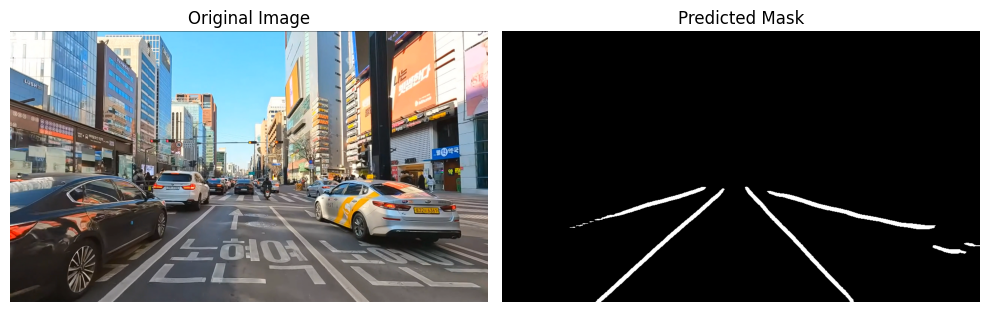

In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. 테스트 이미지 경로 설정 및 불러오기
image_path = '/content/test_image_1.png'  # 테스트할 이미지의 실제 경로로 변경해 줘
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV의 BGR을 PyTorch 모델이 기대하는 RGB로 변환

# 2. 전처리 (Preprocessing)
# 모델 학습 시 사용했던 이미지 크기로 리사이즈 (예: 256x256, 512x512 등 학습 환경에 맞춰 수정)
target_size = (960, 544)
input_image = cv2.resize(image, target_size)

# 정규화 (0~255 값을 0~1로 변환) 및 차원 변경 (H, W, C) -> (C, H, W)
input_tensor = input_image.astype(np.float32) / 255.0
input_tensor = torch.tensor(input_tensor).permute(2, 0, 1)

# 배치(Batch) 차원 추가: (C, H, W) -> (1, C, H, W)
input_tensor = input_tensor.unsqueeze(0)

# 3. 디바이스 설정 및 모델 추론
# 현재 CPU에 있는 모델과 텐서를 그대로 사용하거나, GPU가 가능하다면 GPU로 이동
device = torch.device('cpu')
segmodel = segmodel.to(device)
input_tensor = input_tensor.to(device)

with torch.no_grad():
    output = segmodel(input_tensor)  # 추론 실행

# 4. 후처리 (Postprocessing)
# classes=1 이므로 출력값에 Sigmoid를 취해 0~1 사이의 확률값으로 만들고, 0.5를 기준으로 이진화(Binary Mask)
pred_mask = torch.sigmoid(output)
pred_mask = (pred_mask > 0.5).float()

# 시각화를 위해 텐서를 다시 NumPy 배열로 변환: (1, 1, H, W) -> (H, W)
pred_mask_np = pred_mask.squeeze().cpu().numpy()

# 5. 결과 시각화
plt.figure(figsize=(10, 5))

# 원본 이미지
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(input_image)
plt.axis('off')

# 모델이 예측한 차선 마스크
plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(pred_mask_np, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()